(20, 40)


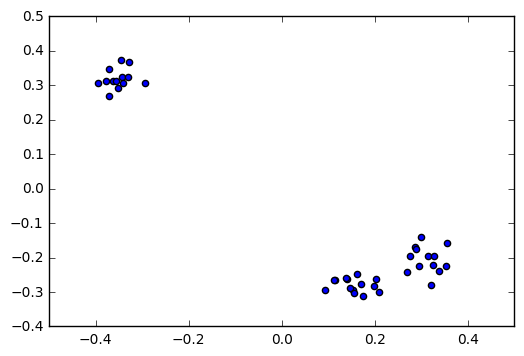

In [1]:
import scipy
from sklearn.preprocessing import normalize
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
#print randn(40,30)
#print scipy.sparse.rand(30,30,density=0.01)
D = 20
K = 40
X, _ = make_blobs(n_samples=K, centers=3, n_features=D)
X = X.T
#X = np.random.randn(D,K)
#X = np.array([[1, 3, 1, 3],[-1,-1,3,3],[3,3,3,1]]).T.astype(float)
normalize(X, norm='l2', axis=0, copy=False, return_norm=True)
#print X.T
np.savetxt('X_{}_{}'.format(D, K), X.T, delimiter=' ', fmt='%.5f')

print X.shape
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X[0,:], X[1,:])
plt.show()

In [2]:
r = 2000
beta = scipy.sparse.rand(K,r,density=0.2)
y = (X * beta)
np.savetxt('y_{}_{}'.format(D, r), y.T, delimiter=' ', fmt='%.5f')

## use learned dictionary to solve the sparse coding, and calculate the error

In [3]:
from sklearn.decomposition import sparse_encode
from sklearn.decomposition import DictionaryLearning, dict_learning_online
alpha = 0.5
"""
dl = DictionaryLearning(K, transform_algorithm='lars', alpha=alpha, transform_alpha=alpha, max_iter=500)
dl.fit(y[:,:r/2].T)
dictionary = dl.components_
code = sparse_encode(y[:,r/2:].T, dictionary, algorithm='lars', alpha=0.5)
"""
_, dictionary = dict_learning_online(y[:,:r/2].T, n_components=K, alpha=alpha, n_iter=500, dict_init=None, batch_size=1, shuffle=False, method='lars', inner_stats=None)
code = sparse_encode(y[:,r/2:].T, dictionary, algorithm='lars', alpha=0.5)
print code.shape
np.set_printoptions(precision=3, suppress=True)
print code

recovery = code.dot(dictionary)
error = np.linalg.norm(recovery - y[:,r/2:].T, axis=1)
print np.sum(np.square(recovery - y[:,r/2:].T))/sum(np.linalg.norm(y[:,r/2:], axis=0) > 0)
print "max/min =", np.max(error), np.min(error)
print "# nozero vector = ", sum(np.linalg.norm(y[:,r/2:], axis=0) > 0)

(1000, 40)
[[ 2.355  0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.832  0.    ...,  0.     0.     0.   ]
 [ 0.     0.    -1.075 ...,  0.     0.     0.   ]
 ..., 
 [ 0.     0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.     0.    ..., -0.627  0.     0.   ]
 [ 0.     0.    -1.218 ...,  0.     0.     0.   ]]
1.02128212268
max/min = 4.14335765771 0.0218542126902
# nozero vector =  1000


## use true dictionary

In [4]:
code = sparse_encode(y[:,r/2:].T, X.T, algorithm='lars', alpha=0.5)
recovery = code.dot(X.T)
error = np.linalg.norm(recovery - y[:,r/2:].T, axis=1)
print np.sum(np.square(recovery - y[:,r/2:].T))/sum(np.linalg.norm(y[:,r/2:], axis=0) > 0)
print "max/min =", np.max(error), np.min(error)
print np.square(recovery - y[:,r/2:].T)

3.47104485072
max/min = 4.91709523484 0.0891024813536
[[ 0.     0.001  0.002 ...,  0.335  0.037  0.016]
 [ 0.     0.035  0.006 ...,  0.63   0.022  0.062]
 [ 0.005  0.003  0.    ...,  0.772  0.173  0.026]
 ..., 
 [ 0.005  0.     0.106 ...,  0.861  0.008  0.209]
 [ 0.006  0.025  0.03  ...,  0.01   0.034  0.004]
 [ 0.001  0.008  0.009 ...,  0.389  0.042  0.039]]


## use random dictionary

In [5]:
random_dict = np.random.randn(K, D)
code = sparse_encode(y[:,r/2:].T, random_dict, algorithm='lars', alpha=0.5)
recovery = code.dot(random_dict)
error = np.linalg.norm(recovery - y[:,r/2:].T, axis=1)
print np.sum(np.square(recovery - y[:,r/2:].T))/sum(np.linalg.norm(y[:,r/2:], axis=0) > 0)
print "max/min =", np.max(error), np.min(error)

7.51709016409
max/min = 5.54883482449 0.103009963737


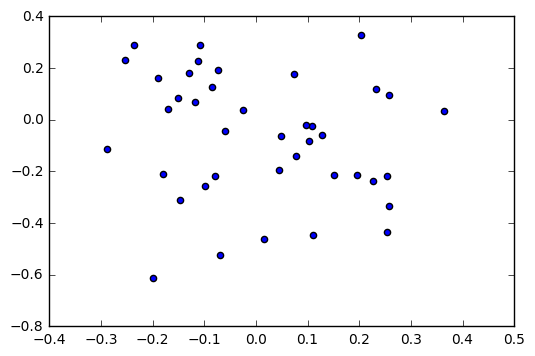

In [6]:
X = dictionary.T
plt.figure()
plt.scatter(X[0,:], X[1,:])
plt.show()